In [ ]:
import h5py
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector
import glob
import os
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read csv to append the data and reset index
path = '/content/drive/MyDrive/goodbaddatanewbalanced.csv'
masterdata = pd.read_csv(path,sep='\t')
masterdata = masterdata.drop(['Unnamed: 0'], axis = 1)

In [ ]:
# Function for generating FFT
from scipy.fftpack import fft, ifft
def fft_data(data, sampling_rate):
    fft_data = np.fft.fft(data)
    N = len(fft_data)
    n = np.arange(N)
    T = N/sampling_rate
    freq = n/T 
    n_oneside = N//2
    # get the one side frequency -->
    f_oneside = freq[:n_oneside] 

    return [f_oneside,n_oneside,fft_data]

In [ ]:
# Taking the sample data for wavelet decomposition analysis
ff = masterdata[(masterdata['Tool'] == 'OP01') & (masterdata['Machine'] == 'M01')& (masterdata['Condition'] == 'good') & (masterdata['Repeat'] == 4)]
ff = ff.reset_index(drop = True)

In [ ]:
ff.Repeat.unique()

array([4])

In [ ]:
# FOR Wavelet level decomposition analysis on signal sample
val = ff['X']#.values[1000: 2000]
sampling_rate = 2000

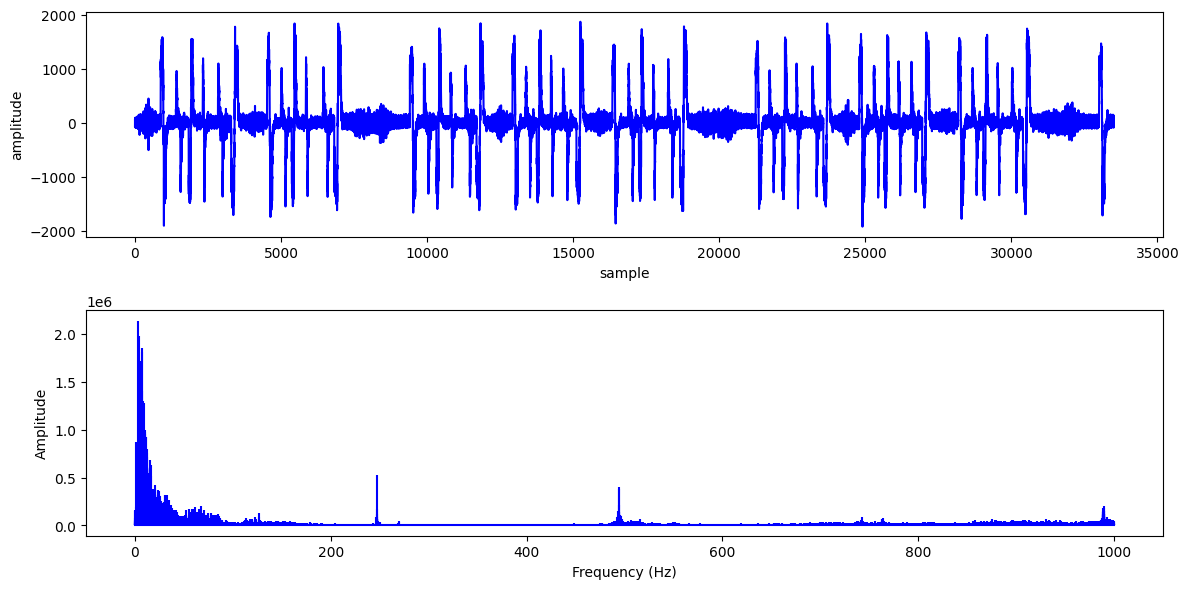

In [ ]:
[f_oneside,n_oneside,XX]= fft_data(val , sampling_rate)
    
#Ploting the signals and its FFT
plt.figure(figsize = (12, 6))
plt.subplot(211)
plt.plot(val,'b')
plt.xlabel('sample')
plt.ylabel('amplitude')


plt.subplot(212)
plt.stem(f_oneside, np.abs(XX[:n_oneside]), 'b',markerfmt=" ", basefmt="b")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [ ]:
import pywt
new_signal = []
w = pywt.Wavelet ('dmey')
level = 1
data_wave = val
wp = pywt.WaveletPacket(data_wave,w, maxlevel = level) # Wavelet packet transformation
packet_names = [node.path for node in wp.get_level(level, "freq")]
print(packet_names)

for v in range(len(packet_names)):
  new_wp = pywt.WaveletPacket(data = None , wavelet = w , maxlevel = level)
  new_wp[packet_names[v]] = wp[packet_names[v]].data
  reconstructed_signal = new_wp.reconstruct(update = False) # Signal reconstruction from wavelet packet coefficients
  new_signal.append(reconstructed_signal)

['a', 'd']


In [ ]:
len(new_signal)

2

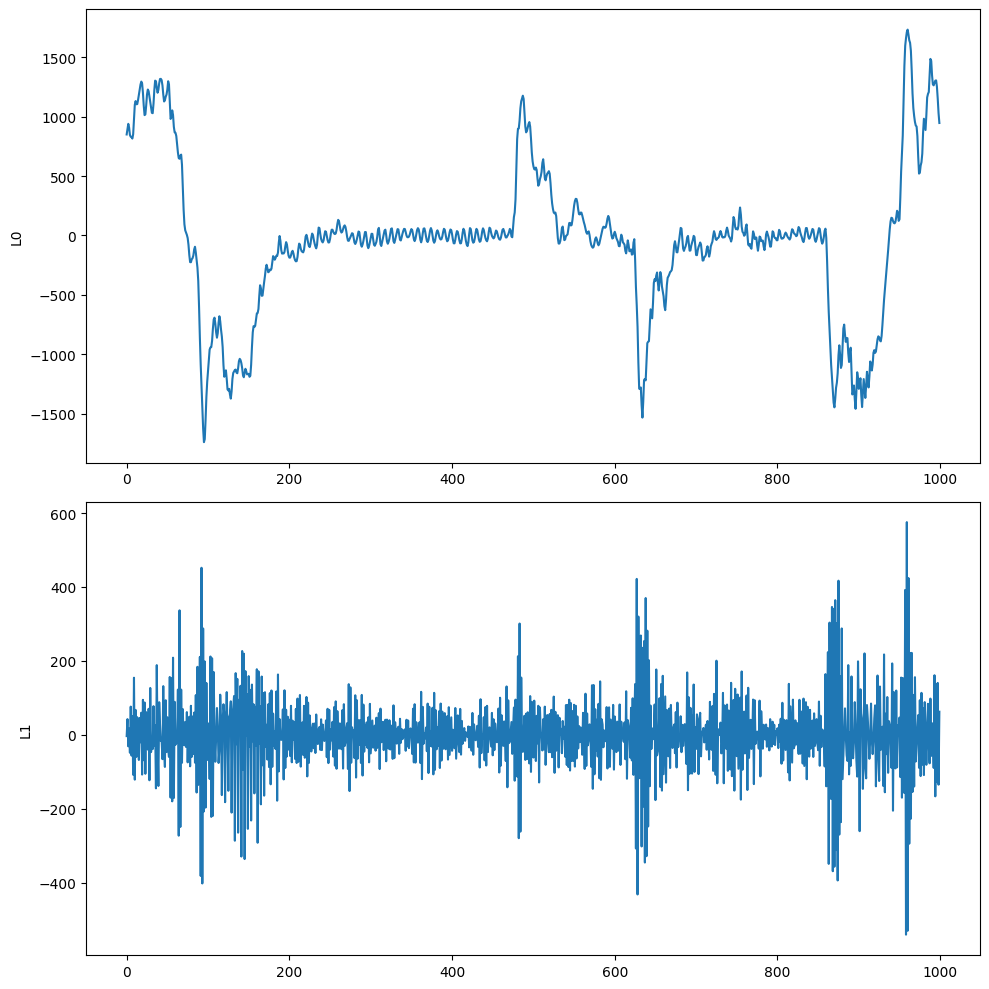

In [ ]:
fig, axes = plt.subplots(len(packet_names), 1, figsize=(10,10))
for v in range(len(packet_names)):
    sig = new_signal[v]
    axes[v].plot(sig)
    axes[v].set_ylabel("L{}".format(v))
plt.tight_layout()
plt.show()



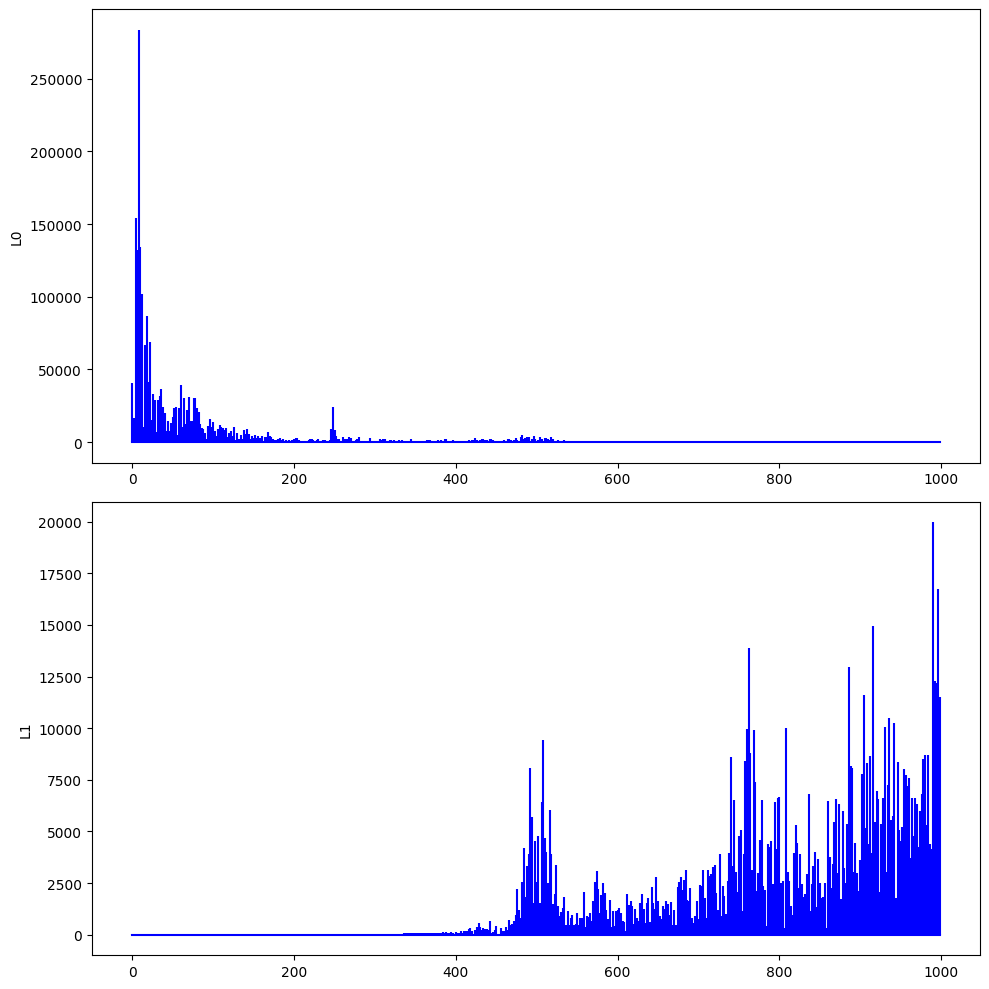

In [ ]:
# Ploting FFT of the reconstructed signal
fig, axes = plt.subplots(len(packet_names), 1, figsize=(10,10))
for v in range(len(packet_names)):
    sig = new_signal[v]
    [f_oneside,n_oneside,XX]= fft_data( sig , sampling_rate)
    axes[v].stem(f_oneside, np.abs(XX[:n_oneside]), 'b',markerfmt=" ", basefmt="b")
    axes[v].set_ylabel("L{}".format(v))
plt.tight_layout()
plt.show()
